In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [6]:
# Load the dataset
df = pd.read_csv(r'C:\AI\DataSet\titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
# 1) Describe the dataset
print("1) Dataset Description:")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("Data types:\n", df.dtypes)

1) Dataset Description:
Number of rows: 891
Number of columns: 12
Data types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [9]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate summary statistics
summary_statistics = pd.DataFrame({
    'Mean': df[numeric_columns].mean(),
    'Median': df[numeric_columns].median(),
    'Mode': df[numeric_columns].mode().iloc[0],  # Mode can have multiple values, we choose the first
    'Range': df[numeric_columns].max() - df[numeric_columns].min(),
    'Standard Deviation': df[numeric_columns].std()
})

# Display the summary statistics
print("Summary Statistics for Numerical Features:")
print(summary_statistics)

Summary Statistics for Numerical Features:
                   Mean    Median   Mode     Range  Standard Deviation
PassengerId  446.000000  446.0000   1.00  890.0000          257.353842
Survived       0.383838    0.0000   0.00    1.0000            0.486592
Pclass         2.308642    3.0000   3.00    2.0000            0.836071
Age           29.699118   28.0000  24.00   79.5800           14.526497
SibSp          0.523008    0.0000   0.00    8.0000            1.102743
Parch          0.381594    0.0000   0.00    6.0000            0.806057
Fare          32.204208   14.4542   8.05  512.3292           49.693429


In [10]:
# Select only categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Display frequency distribution and unique values
for column in categorical_columns:
    print(f"\nExploring Categorical Feature: {column}")
    print(f"Frequency Distribution:\n{df[column].value_counts()}\n")
    print(f"Unique Values: {df[column].unique()}\n")


Exploring Categorical Feature: Name
Frequency Distribution:
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

Unique Values: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. M

<Figure size 1500x1000 with 0 Axes>

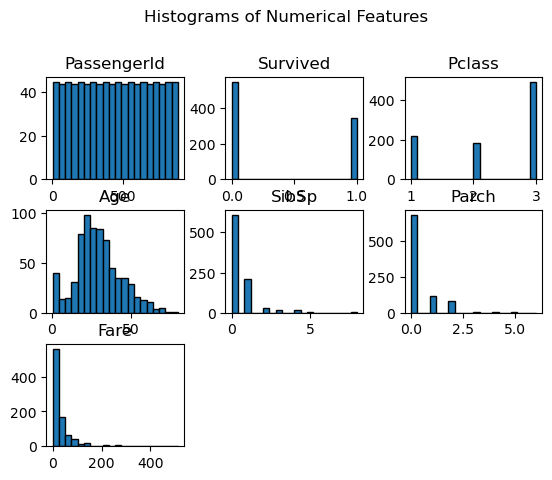

NameError: name 'sns' is not defined

<Figure size 1500x1000 with 0 Axes>

In [11]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Visualize distributions using histograms
plt.figure(figsize=(15, 10))
df[numeric_columns].hist(bins=20, edgecolor='black', grid=False)
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.show()

# Visualize distributions using box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_columns])
plt.title("Box Plots of Numerical Features")
plt.show()

In [12]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Identify outliers using z-score
z_scores = np.abs((df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std())
outliers = (z_scores > 3).any(axis=1)

# Print the number of outliers
print("Number of outliers:", outliers.sum())

# Handling outliers (replace with median)
df_no_outliers = df.copy()
df_no_outliers[numeric_columns] = df_no_outliers[numeric_columns].mask(outliers, df_no_outliers[numeric_columns].median())

# Re-run summary statistics without outliers
print("\nNumerical Features Summary without Outliers:")
print(df_no_outliers[numeric_columns].describe())

Number of outliers: 66


ValueError: Must specify axis=0 or 1

In [13]:
# Count missing values per column
missing_values_count = df.isnull().sum()

# Display missing values count per column
print("Missing Values Count per Column:")
print(missing_values_count)

Missing Values Count per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [14]:
# Analyze missing data patterns
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of Missing Values per Column:")
print(missing_percentage)

Percentage of Missing Values per Column:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


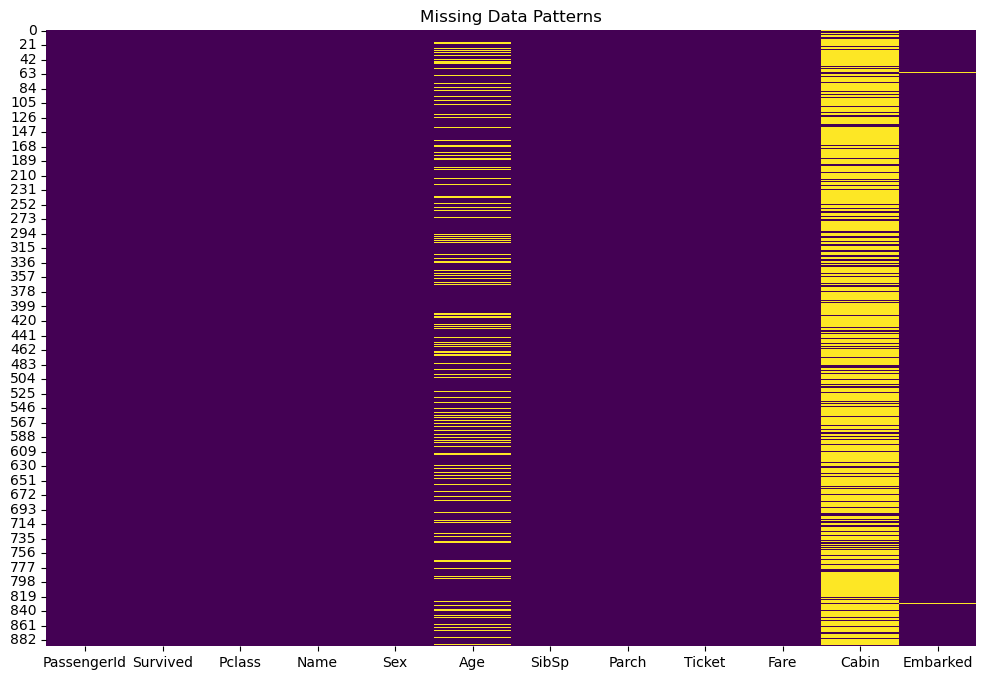

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data patterns
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Data Patterns")
plt.show()

In [18]:
# Detect and display duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


Frequency of Duplicated Rows: 0

Distribution of Duplicated Values Across Columns:
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Count]
Index: []


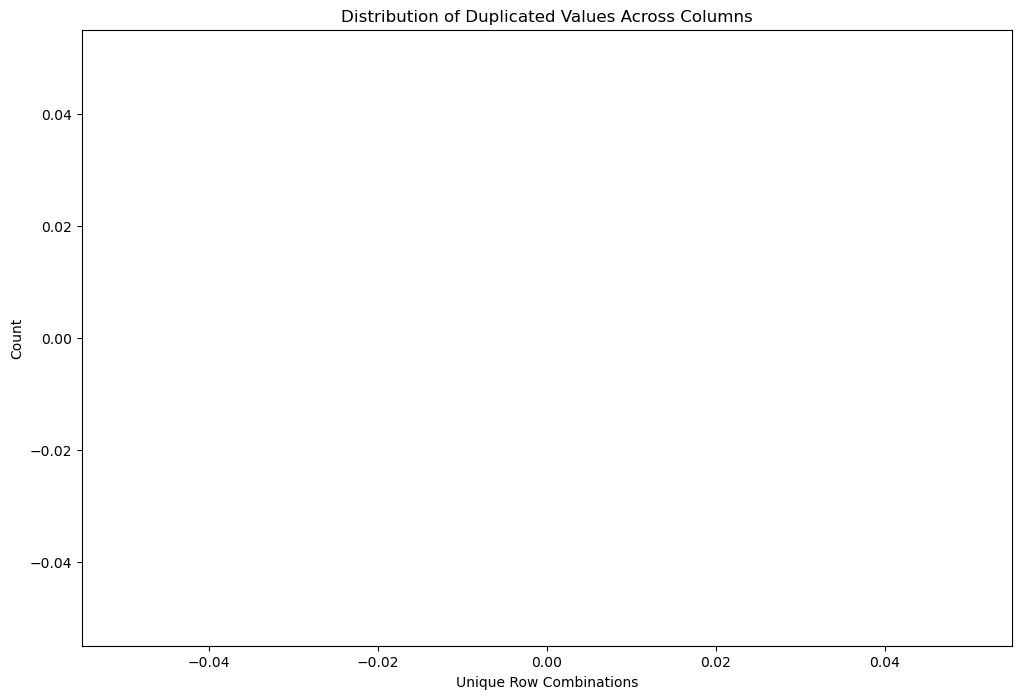

In [19]:
# Analyze the frequency of duplicated values
duplicate_counts = df.duplicated().sum()

# Analyze the distribution of duplicated values across columns
column_duplicate_counts = df[df.duplicated(keep=False)].groupby(df.columns.tolist()).size().reset_index(name='Count')

# Display the results
print("Frequency of Duplicated Rows:", duplicate_counts)
print("\nDistribution of Duplicated Values Across Columns:")
print(column_duplicate_counts)

# Visualize the distribution of duplicated values
plt.figure(figsize=(12, 8))
plt.bar(column_duplicate_counts.index, column_duplicate_counts['Count'])
plt.xlabel('Unique Row Combinations')
plt.ylabel('Count')
plt.title('Distribution of Duplicated Values Across Columns')
plt.show()

In [20]:
# Remove duplicates, keeping only the first occurrence
df_no_duplicates = df.drop_duplicates()

# Display the DataFrame without duplicates
print("DataFrame without Duplicates:")
print(df_no_duplicates)

DataFrame without Duplicates:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [21]:
# Keep one instance of each set of identical rows, remove subsequent occurrences
df_no_duplicates = df.drop_duplicates(keep='first')

# Display the DataFrame without duplicates
print("DataFrame with One Instance of Duplicates:")
print(df_no_duplicates)

DataFrame with One Instance of Duplicates:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                        

In [22]:
# Remove duplicates based on specific criteria (e.g., ticket number)
df_no_duplicates_ticket = df.drop_duplicates(subset=['Ticket'], keep='first')

# Remove duplicates based on another criterion (e.g., passenger name)
df_no_duplicates_name = df.drop_duplicates(subset=['Name'], keep='first')

# Display the DataFrames without duplicates
print("DataFrame without Duplicates (Based on Ticket):")
print(df_no_duplicates_ticket)

print("\nDataFrame without Duplicates (Based on Name):")
print(df_no_duplicates_name)

DataFrame without Duplicates (Based on Ticket):
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
884          885         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                   